# 3M1 Introduction to optimization

Prof. Gábor Csányi (gc121)

Topics:

- Unconstrained optimization
 - Definitions, line search
 - Gradient methods: Steepest Descent, Conjugate Gradients, Newton's method
- Linear Programming: Simplex Algorithm
- Constrained Optimization
 - Lagrange and Kunh-Tucker multipliers
 - Barrier and penalty methods

## Aims

Optimisation is the formal (mathematical) theory and practice of making a choice to achieve the best outcome.

In order to carry it out, one must:

1. Understand the role of a formal approach in the broader context of the problem
1. Identify parameters that can be changed
1. Formulate a mathematical criterion for what is "best"
1. Identify potential restrictions
1. Select an appropriate algorithm
1. Correctly interpret the result

## Goal of optimisation

- Find the combination of parameters (independent variables, control variables) which minimizes/maximizes a given quantity...
- ... possibly subject to some restrictions on the allowed range of parameters

## Definitions

- The quantity to be minimized/maximized is called the __objective function__, or __cost function__, or __utility function__
- The parameters that can be changed are __control__ or __decision variables__
- The restrictions on the allowed parameter values are __constraints__

minimize
$
\quad f(x),  \quad x = (x_1,x_2,x_3,\ldots x_n)^T
$

subject to
$
\quad c_i(x) = 0, \quad i=1,\ldots ,m'\quad(\textrm{equality})
$

and
$
\quad\qquad c_i(x) \ge 0, \quad i=m'+1,\ldots, m\quad(\textrm{inequality})
$

$f(x)$ is the __objective function__

$x$ is the column vector of $n$ __control variables__

$\{c_i(x)\}$ is the set of __constraint functions__

Inequality constraints that are simply restrictions on the allowed values of a single control variable are __bounds__, e.g. $x_{i\textrm{min}} \le x_i \le x_{i\textrm{max}}$

## Classification

__Linear__
$$
f(x) = b^T x + c
$$

__Quadratic__
$$
f(x) = x^T A x + b^T x + c
$$

(__Nonlinear__ typically means neither linear, nor quadratic)

## Constraints

Make things more difficult

- _Equality_ constraints can sometimes be eliminated by substitution
- _Inequality_ can sometimes be left out and candidate results checked

(But we will learn to treat them formally) 

## Optimisation methods

Define __optimality criteria__, then

- Analytical: equations derived from criteria and solved for variables
- Numerical: search method

 1. Initial trial point selected
 1. A move is proposed, and if objective function is reduced, new point is retained
 1. Repeat until criteria satisfied (minimum is reached) or we run out of resources
 

This course is mostly about search methods, needed when:

- Number of variables is large
- Equations cannot be solved analytically

Algorithms differ in how they update the variables.

## Example

__Task: design a beer can to hold 330 ml of beer__

Cylindrical shape, about 5% "air space", cost (amount of material) is proportional to surface area.

![beer can](http://www.iconarchive.com/download/i13047/gordon-irving/simpsons-2/Duff-1.ico)

Two independent variables: base radius ($r$), height ($h$)

Objective function to minimize: $$A = 2\pi r^2 + 2\pi r h = 2\pi (r^2 + rh)$$

Equality constraints: $$V = \pi r^2 h = 345 \textrm{ cc}$$

Inequality constraints:
\begin{array}{l}
25 \textrm{ mm} \le r \le 50 \textrm{ mm}\\
0 \lt h
\end{array}

Ignore inequality constrains for the moment. Substitute for $h$ using the equality constraint,

$$
A = f(r) = 2\pi(r^2 + \frac{V}{\pi r})
$$

## More definitions

When minimizing $f(x)$ subject to $x \in S$ (as a result of all constraints together),

\begin{array}
SS&\text{is the } \textbf{feasible region}\\
\text{any }x \in S&\text{is a }\textbf{feasible solution}\\
\end{array}

The __gradient__ is 

$$
g(x) = \nabla f(x) = \left[\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2},\ldots,
\frac{\partial f}{\partial x_n}\right]^T
$$

And the __Hessian__ is

$$
H(x) = \nabla(\nabla f(x)) = 
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \ldots & \frac{\partial^2 f}{\partial x_1 \partial x_n}\\
\vdots & \ddots & \vdots\\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \ldots & \frac{\partial^2 f}{\partial x_n^2}\\
\end{bmatrix}
$$

## Feasible directions

At a feasible point $x$, a direction $d$ is a __feasible direction__ if an arbitrary small move from $x$ in direction $d$ remains feasible


In [3]:
from pylab import *
import numpy as np

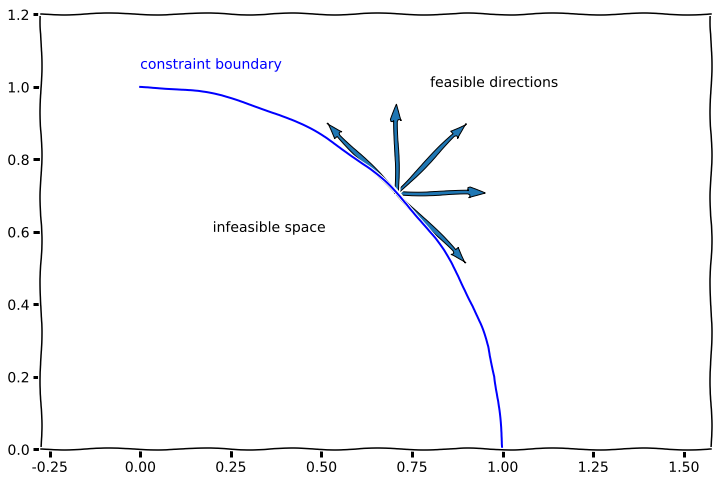

In [14]:

fig=figure(figsize=(12,8))
x = np.linspace(0,1, 50)
plot(x, np.sqrt(1-x**2), 'b')
text(0.2,0.6, 'infeasible space')
a = 1/np.sqrt(2); 
arrow(a, a, 0.2, 0, width=0.01)
arrow(a, a, 0.16, 0.16, width=0.01)
arrow(a, a, 0, 0.2, width=0.01)
arrow(a, a, 0.16, -0.16, width=0.01)
arrow(a, a, -0.16, 0.16, width=0.01)
text(0.8, 1.0, 'feasible directions')
text(0.0, 1.05, 'constraint boundary', color='b')
axis('equal')
axis((0.0, 1.3, 0.0, 1.2))
show()


## Stationary point

If $f(x)$ is smooth so that $g(x) = \nabla f(x)$ exists, then $x^*$ is a __stationary point__ of $f$ if

$$
g(x^*) = 0
$$

## Minima

$$
$$

\begin{align}
\textbf{Global minimum }\quad & f(x^*) \le f(y) \qquad \forall\, y \in S \\
\\
\textbf{Strong global minimum }\quad & f(x^*) \lt f(y) \qquad \forall\, y \in S, y \neq x^* \\
\\
\textbf{Weak local minimum }\quad & f(x^*) \le f(y) \qquad \forall\, y = x+\varepsilon d \in S, y \neq x^* 
\end{align}


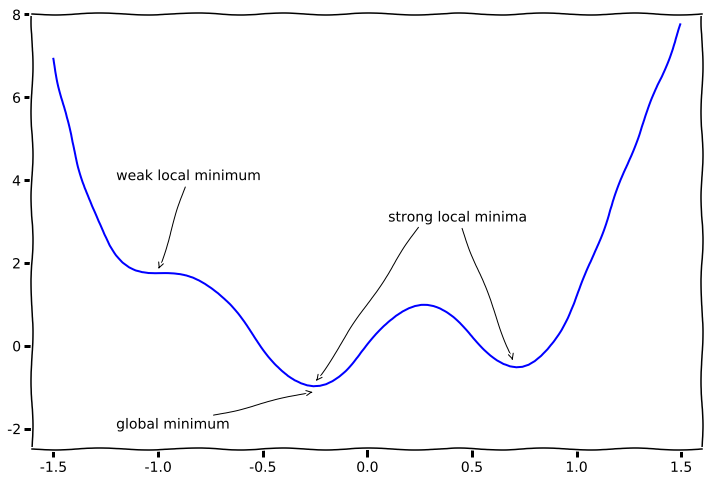

In [148]:
x = np.linspace(-1.5,1.5,100)
figure(figsize=(12,8))
plot(x, 1.45*x**4 + sin(6*x), 'b')
axis((-1.6, 1.6,-2.5, 8))
annotate(s="global minimum", xy=(-0.25,-1.1), xytext=(-1.2, -2), arrowprops=dict(arrowstyle='->'))
annotate(s="weak local minimum", xy=(-1.0,1.8), xytext=(-1.2, 4), arrowprops=dict(arrowstyle='->'))
annotate(s="strong local minima", xy=(0.7,-0.4), xytext=(0.1, 3), arrowprops=dict(arrowstyle='->'))
annotate(s="", xy=(-0.25,-0.9), xytext=(0.25, 2.9), arrowprops=dict(arrowstyle='->'))

show()

## Constraints complicate things

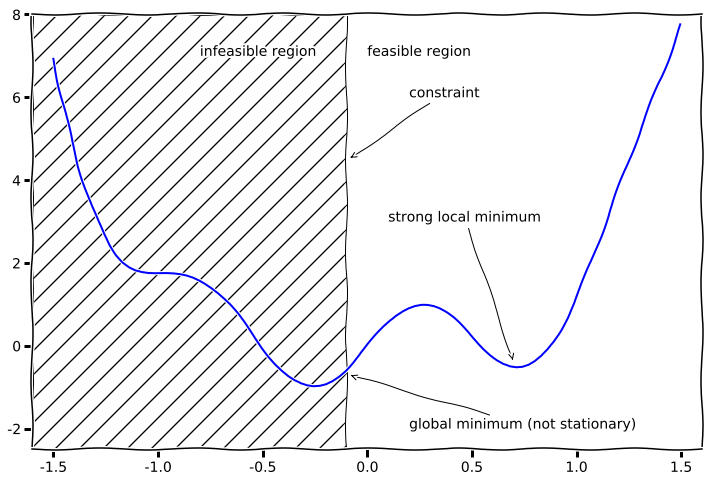

In [149]:
import matplotlib.patches as patches
x = np.linspace(-1.5,1.5,100)
figure(figsize=(12,8))
plot(x, 1.45*x**4 + sin(6*x), 'b')
axis((-1.6, 1.6,-2.5, 8))
annotate(s="global minimum (not stationary)", xy=(-0.09,-0.7), xytext=(0.2, -2), arrowprops=dict(arrowstyle='->'))
annotate(s="strong local minimum", xy=(0.7,-0.4), xytext=(0.1, 3), arrowprops=dict(arrowstyle='->'))
gca().add_patch(patches.Rectangle((-1.6, -2.5), 1.5, 10.5, hatch='/',fill=False))
text(0.0, 7, 'feasible region')
text(-0.8, 7, 'infeasible region')
annotate(s="constraint", xy=(-0.09, 4.5), xytext=(0.2, 6), arrowprops=dict(arrowstyle='->'))
show()

## Unimodality

- A function is __unimodal__ if it has a single minimum. 

- It is __strongly unimodal__ if along a straight line from every point to the minimum the gradient $< 0$

In [4]:
x,y = np.meshgrid(np.linspace(-1.7,1.7,100), np.linspace(-0.8,3,100))
R = (1-x)**2 + 10*(y-x**2)**2

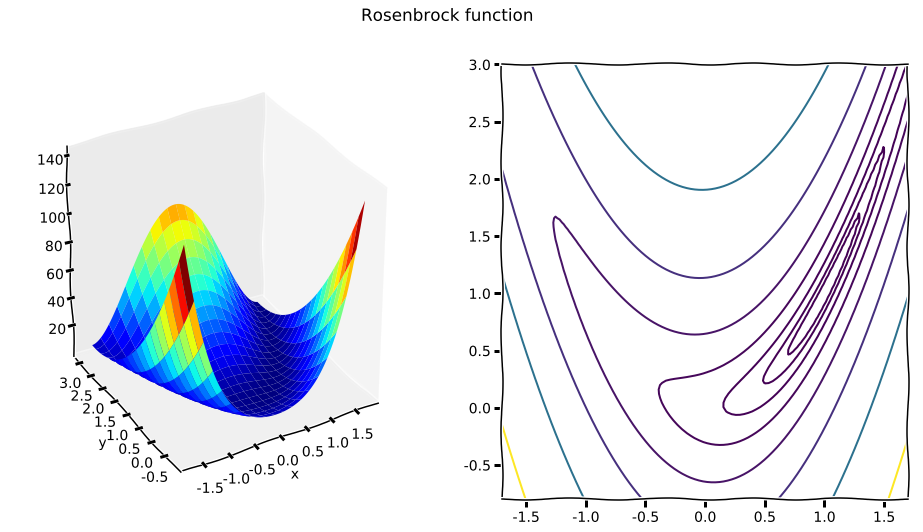

In [133]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure(figsize=(16,8))
fig.suptitle('Rosenbrock function')

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(x, y, R, rstride=5, cstride=5, cmap=cm.jet, linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.view_init(elev=30, azim=-120)


ax = fig.add_subplot(1,2,2)
ax.contour(x, y, R, np.logspace(-1,2, 8))

show()

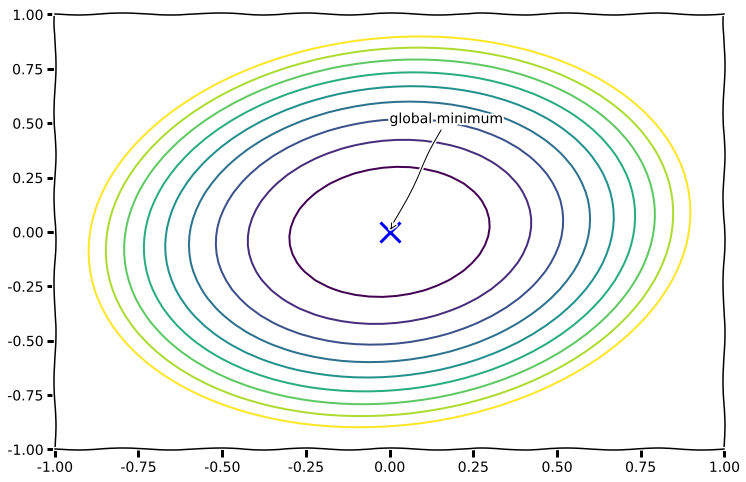

In [147]:
x, y = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
f = x**2+y**2 - 0.2*x*y
figure(figsize=(12,8))
contour(x, y, f, linspace(0, 0.8, 10))
plot([0], [0], 'bx', markersize=20, markeredgewidth=3)
annotate(s="global minimum", xy=(0,0), xytext=(0,0.5), arrowprops=dict(arrowstyle='->'))
show()

## Conditions for a local minimum

A __necessary__ condition for $x^*$ to be a _local minimum_ of $f(x)$ in $S$ is 

$$
\nabla f(x^*) \cdot d \ge 0
$$

for all feasible directions $d$.

If $x^*$ is an __interior point__:

- $\nabla f(x^*) = 0$ (all directions are feasible)
- This condition applies to maxima and saddles points, which are also stationary points
- Thus this condition is __necessary but not sufficient__

## Sufficient conditions for a local minimum

For the _univariate_ case, the __Taylor expansion__ around $x^*$ is

\begin{align}
f(x) &= f(x^*) + (x-x^*) f'(x^*) + \frac12 (x-x^*)^2 f''(x^*) + \ldots\\
f(x) - f(x^*) &= (x-x^*) f'(x^*) + \frac12 (x-x^*)^2 f''(x^*) + \ldots\\
\end{align}

If $x^*$ is an interior stationary point, $f'(x^*) = 0$, so we have a minimum if 

$$ 
f(x) - f(x^*) \approx \frac12 (x-x^*)^2 f''(x^*) \ge 0
$$


$$\boxed{\large f''(x^*) \ge 0}\strut$$

## Sufficient conditions for a local minimum

For the _multivariate case_ the Taylor series is

$$
f(x) = f(x^*) + (x-x^*)^T \nabla f(x^*) + \frac12 (x-x^*)^T H(x^*) (x-x^*) + \ldots
$$

If $x^*$ is an interior stationary point, $\nabla f(x^*) = 0$. Let $d = x-x^*$. Then $x^*$ is a minimum if

$$
\boxed{\large d^T H(x^*) d \ge 0 \qquad \forall d\strut}
$$

I.e. if $H(x^*)$ is __positive semidefinite__.  

- If $H(x)$ is positive definite everywhere (e.g. for a quadratic function), $f$ is a __convex function__, and therefore the minimum is unique and a _global minimum_. 
- A matrix is positive definite if and only if all its __eigenvalues are positive__.
- If $H(x^*) = 0$, higher order terms determine whether $x^*$ is a minimum or not.

## Back to the beer can

![beer can](http://www.iconarchive.com/download/i13047/gordon-irving/simpsons-2/Duff-1.ico)

Objective function: $$f(r) = r^2 + \frac{V}{\pi r}$$

Necessary condition: $$0 = \frac{df}{dr} = 2r-\frac{V}{\pi r^2}$$

Candidate solution: $$ r^* = \left(\frac{V}{2\pi}\right)^{1/3}$$

For $V=345\text{ ml}$, $r^* = 38\text{ mm}$, which satisfies the constraints $25\text{ mm} \le r^* \le 50\text{ mm}$, so it is feasible. 

Need to check sufficiency condition $$ \frac{d^2 f}{d r^2} = 2+\frac{2V}{\pi r^3} \ge 0$$
so $r^*$ is a minimum, and $h^* = V/\pi r^2 = 76\text{ mm}$.

Real cans have $r=33\text{ mm}$.
    